# DataDrift

This notebook demos the webscraping and analysis abilities of DataDrift.
This workflow is all internal to the Drift.py module
DataDrift is a Python package that returns information about vehicle prices.

In [2]:
# IMPORT STATEMENTS
from DataDrift.scrapers.cars_scraper import scrape_data_payload
from DataDrift.scrapers.genurls import gen_cars_com_urls
from DataDrift.stats.clean import calc_pct_deltas, sort_trims, process_data_payload
#from DataDrift.Drift import Drift
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Generating Target URLS to scrape from

In [109]:
car_dict = {
    #"ford": ["mustang", "f_150"],
    #"chevrolet": ["camaro"],
    "toyota": ["camry", "supra", "gr_supra"],
    #"bmw": ["330", "z4", "430", "m340", "m440",],
    #"audi": ["a4", "s4", "s3", "a5", "s5"],
    #"audi": ["rs3"]
    #"subaru": ["brz"],
    #"acura": ["integra"],
    #"lexus": ["rc_f"],
    #"tesla": ["model_s"],
    #"porsche": ["718_cayman", "718_boxster"],
    #"acura": ["mdx"],
    #"infiniti": ["qx60", "qx80"],
    #"kia": ["telluride"],
    #"genesis": ["gv80"],
    #"gmc": ["yukon"],
    #"volvo": ["xc90"],
    #"hyundai": ["palisade"],
    #"honda": ["pilot"],
    #"lexus": ["lx_600"],
    #"lincoln": ["aviator"],
    #"mercedes_benz": ["gle_350"], # make alphabeticals lower case
    #"bmw": ["x3", "x5"]
}

url_targets = gen_cars_com_urls(input_dict=car_dict)
url_targets


['https://www.cars.com/shopping/results/?stock_type=all&makes=toyota&models=toyota-camry&zip=15238&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=toyota&models=toyota-camry&zip=47907&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=toyota&models=toyota-camry&zip=78701&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=toyota&models=toyota-camry&zip=95814&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=toyota&models=toyota-camry&zip=14623&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&make

In [99]:
temp = scrape_data_payload(url_targets)

Processing the scraped data

In [100]:
columns = ["make", "model", "model_year", "trim", "mileage", "price", "listing_id", "bodystyle", ] 

df = pd.DataFrame(temp, columns=columns)

In [101]:
scraped_results = {}
cat_model_list = []
for make in car_dict.keys():
    for model in car_dict[make]:
        filt = (df["make"]==make) & (df["model"]==model)
        print(make+"_"+model)
        scraped_results[make+"_"+model] = df[filt]


bmw_x3
bmw_x5


In [105]:
%%capture --no-stdout --no-display

#m340 = scraped_results["bmw_m340"]
#m440 = scraped_results["bmw_m440"]
#a4 = scraped_results["audi_a4"]
#s3 = scraped_results["audi_s3"]
#camry = scraped_results["toyota_camry"]
#brzs = scraped_results["subaru_brz"]
#brzs.dropna(inplace=True)
#rcfs = scraped_results["lexus_rc_f"]
#mustangs = scraped_results["ford_mustang"]
#models = scraped_results["tesla_model_s"]
#caymans = scraped_results["porsche_718_cayman"]
#boxsters = scraped_results["porsche_718_boxster"]
#camaros = scraped_results["chevrolet_camaro"]

mdxsasdf = scraped_results["bmw_x5"]
mdxs = mdxsasdf.dropna()

#m440_mod = sort_trims(m440)
#a4 = sort_trims(a4)
#camry = sort_trims(camry,spec="se")
#mustangs = sort_trims(mustangs,spec="ecoboost")
trims, counts = np.unique(np.array(mdxs["trim"]),return_counts=True)
for e in zip(trims,counts):
    print(e)

#camaros_trimmed = sort_trims(camaros, spec="lt1")

#m340 = calc_pct_deltas(m340)
#m440 = calc_pct_deltas(m440)
#a4 = calc_pct_deltas(a4)
#s3 = calc_pct_deltas(s3)
#camry = calc_pct_deltas(camry)
#brzs = calc_pct_deltas(brzs)
#rcfs = calc_pct_deltas(rcfs)
#mustangs = calc_pct_deltas(mustangs)
#models = calc_pct_deltas(models)
#caymans = calc_pct_deltas(caymans)
#boxsters = calc_pct_deltas(boxsters)
#camaros = calc_pct_deltas(camaros_trimmed)

#boxsters.dropna(inplace=True)
#caymans.dropna(inplace=True)

('4.6is', 1)
('m50i', 16)
('m60i', 5)
('sdrive35i', 6)
('sdrive40i', 18)
('xdrive30i', 3)
('xdrive35d', 3)
('xdrive35i', 36)
('xdrive35i_premium', 2)
('xdrive40i', 96)
('xdrive48i', 1)
('xdrive50i', 11)
('xdrive_35i_sport_activity', 2)


In [11]:
#plt.figure(1)
#plt.scatter(camry["year_delta"], camry["price_pct"])
#plt.xlabel("years")
#plt.ylabel("pct depreciation")
#
#plt.figure(2)
#plt.scatter(camry["mileage"].values.astype(float)/1000, camry["price_pct"])
#plt.xlabel("miles (1000s)")
#plt.ylabel("pct depreciation")
#
#plt.figure(3)
#ax = plt.axes(projection ="3d")
#ax.scatter3D(camry["year_delta"], camry["mileage"].values.astype(float)/1000, camry["price_pct"])



In [7]:
from scipy.optimize import curve_fit
import scipy.stats as stats

In [106]:
def exp_decay(x,A,B,C):
    """Models exponential decay.

    Args:
        x: independant variable
        A: A
        B: B
        C: C
        
    Returns:
        dependant variable
    """
    return A*np.exp(-B*x) - C

y=mdxs["price"]
x=mdxs["mileage"].values.astype(float)/1000

popt, pcov = curve_fit(exp_decay,x,y,p0=[y.max(),1,1],)

,0,1
19,0.193,76820.015415
20,0.354,76627.911574
15,0.478,76480.316207
170,1.130,75709.382317
108,1.439,75347.009900


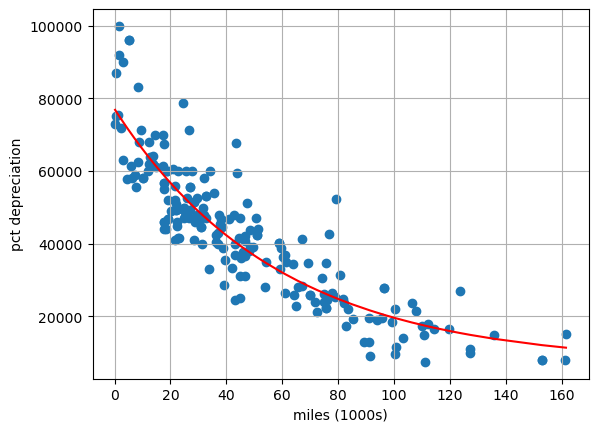

In [107]:
plt.figure(2)
plt.scatter(mdxs["mileage"].values.astype(float)/1000, mdxs["price"])
plt.xlabel("miles (1000s)")
plt.ylabel("pct depreciation")

work_price = exp_decay(mdxs["mileage"].values.astype(float)/1000, popt[0], popt[1], popt[2])

fuckyou = pd.DataFrame([mdxs["mileage"].values.astype(float)/1000, work_price])
fuckyou = fuckyou.T
fuckyou.sort_values(0,inplace=True)

plt.plot(fuckyou[0], fuckyou[1], c="red")
plt.grid()

fuckyou.head()